In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="A4KDjfnhlLtIl2fyB5rw")
project = rf.workspace("food-hofna").project("food-detection-fme3o")
version = project.version(8)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...


In [3]:
pip install ultralytics roboflow opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 20.3 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import cv2
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
data_path = os.path.join(dataset.location, "data.yaml")

In [6]:
model = YOLO('yolov8n.pt')

model.train(data=data_path, epochs=50, imgsz=640, batch=16, name='yolo_food_detection')

100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


Ultralytics 8.3.67 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Food-Detection-8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo_food_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 26.6MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 84.7MB/s]


AMP: checks passed ✅


train: Scanning /content/Food-Detection-8/train/labels... 509 images, 0 backgrounds, 0 corrupt: 100%|██████████| 509/509 [00:00<00:00, 1897.56it/s]

train: New cache created: /content/Food-Detection-8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Food-Detection-8/valid/labels... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<00:00, 1648.37it/s]

val: New cache created: /content/Food-Detection-8/valid/labels.cache


Plotting labels to runs/detect/yolo_food_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_food_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.17G     0.8858      3.588      1.313         45        640: 100%|██████████| 32/32 [00:14<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]


                   all         47         96    0.00931      0.941      0.193       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.18G     0.8116      2.621      1.278         50        640: 100%|██████████| 32/32 [00:09<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         47         96      0.715       0.42      0.468      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.18G     0.8749      2.111      1.296         50        640: 100%|██████████| 32/32 [00:08<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         47         96       0.51      0.485      0.546      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.19G     0.8817      1.856      1.293         59        640: 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         47         96      0.555      0.519      0.547      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.19G     0.8256       1.68      1.252         47        640: 100%|██████████| 32/32 [00:09<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         47         96      0.553      0.651      0.625      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.19G     0.8143      1.552      1.247         49        640: 100%|██████████| 32/32 [00:08<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         47         96      0.607      0.729      0.772      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G     0.7827       1.49      1.199         61        640: 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         47         96      0.702       0.67      0.762      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.19G     0.7802      1.413      1.206         47        640: 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         47         96      0.672      0.816      0.774      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.2G     0.7674      1.325      1.193         54        640: 100%|██████████| 32/32 [00:09<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         47         96      0.664      0.657      0.642      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.18G     0.7502      1.285      1.171         61        640: 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


                   all         47         96      0.645      0.674      0.756      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.19G     0.7441      1.293      1.181         38        640: 100%|██████████| 32/32 [00:08<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         47         96       0.81      0.721      0.813      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.18G     0.7298       1.23      1.162         55        640: 100%|██████████| 32/32 [00:08<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         47         96      0.627      0.763      0.745       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.19G     0.7054      1.165      1.145         54        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         47         96        0.9      0.767      0.898       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.19G     0.7096       1.11      1.134         56        640: 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         47         96      0.758       0.83      0.878      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.17G     0.6921      1.101      1.134         54        640: 100%|██████████| 32/32 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         47         96      0.798      0.833      0.856      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.19G     0.6862      1.038      1.132         25        640: 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         47         96       0.66      0.857      0.853      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.18G     0.6734       1.01      1.115         49        640: 100%|██████████| 32/32 [00:10<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         47         96      0.787      0.857      0.841      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.19G     0.6645     0.9683      1.112         59        640: 100%|██████████| 32/32 [00:07<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         47         96      0.841      0.791      0.849      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.19G     0.6447     0.9215      1.102         57        640: 100%|██████████| 32/32 [00:09<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         47         96      0.882       0.74      0.856      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.18G      0.648     0.9497      1.103         66        640: 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


                   all         47         96      0.836      0.775      0.845      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.19G     0.6656      0.962        1.1         44        640: 100%|██████████| 32/32 [00:08<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         47         96      0.846      0.796      0.874      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.19G     0.6336     0.8871      1.089         57        640: 100%|██████████| 32/32 [00:08<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         47         96       0.84      0.862      0.868      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.19G     0.6428     0.8874      1.079         39        640: 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]


                   all         47         96      0.752      0.813      0.855      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.19G      0.618     0.8501      1.078         39        640: 100%|██████████| 32/32 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         47         96      0.802      0.843      0.852      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.19G     0.6006     0.8406       1.07         40        640: 100%|██████████| 32/32 [00:08<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         47         96      0.826      0.835      0.884      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.19G     0.6158     0.8092      1.084         46        640: 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         47         96      0.822      0.825      0.852      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.17G     0.6052      0.784      1.074         50        640: 100%|██████████| 32/32 [00:08<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         47         96      0.876      0.917      0.939      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.19G     0.6023      0.764      1.069         66        640: 100%|██████████| 32/32 [00:09<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         47         96      0.826      0.838      0.871      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.19G     0.5757     0.7326      1.052         58        640: 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


                   all         47         96      0.847      0.845      0.849      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.19G     0.5904     0.7434      1.065         38        640: 100%|██████████| 32/32 [00:08<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         47         96       0.89      0.821      0.887      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.18G     0.5755     0.7175      1.054         41        640: 100%|██████████| 32/32 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         47         96      0.829      0.797      0.913       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.19G     0.5608     0.7231      1.051         55        640: 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         47         96      0.753      0.876      0.893      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.19G     0.5603     0.7244      1.044         66        640: 100%|██████████| 32/32 [00:07<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         47         96      0.845      0.809      0.866       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.19G     0.5253     0.6711      1.029         38        640: 100%|██████████| 32/32 [00:09<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         47         96       0.74      0.829      0.843      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.19G     0.5488     0.7032      1.031         38        640: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         47         96      0.815      0.886      0.894      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.19G     0.5547     0.6914      1.042         41        640: 100%|██████████| 32/32 [00:07<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         47         96      0.732      0.872       0.86      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.19G      0.533      0.659      1.032         45        640: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         47         96      0.842      0.843      0.881      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.19G     0.5269     0.6289      1.026         63        640: 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         47         96      0.864       0.86      0.897      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.19G     0.5141     0.6355      1.026         51        640: 100%|██████████| 32/32 [00:07<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         47         96      0.862      0.816      0.881      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.2G     0.4869     0.6035      1.006         39        640: 100%|██████████| 32/32 [00:10<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         47         96      0.879      0.825      0.905      0.781


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.16G     0.4153      0.638     0.9415         32        640: 100%|██████████| 32/32 [00:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         47         96       0.87       0.82      0.878      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G     0.4075     0.5841     0.9338         23        640: 100%|██████████| 32/32 [00:07<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         47         96      0.869      0.863      0.892      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.16G     0.4006     0.5843     0.9364         23        640: 100%|██████████| 32/32 [00:09<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         47         96      0.844      0.884      0.917      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.17G     0.3848     0.5537     0.9266         22        640: 100%|██████████| 32/32 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         47         96      0.853      0.851      0.896      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.17G     0.3904     0.5657      0.935         22        640: 100%|██████████| 32/32 [00:07<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


                   all         47         96      0.851      0.859        0.9      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.16G     0.3668     0.5491     0.9143         20        640: 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         47         96       0.84      0.919      0.909      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.16G     0.3762     0.5307     0.9206         25        640: 100%|██████████| 32/32 [00:08<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         47         96      0.833      0.924      0.905      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.19G      0.361      0.523     0.9072         28        640: 100%|██████████| 32/32 [00:08<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         47         96      0.812      0.906      0.914      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.17G     0.3492     0.5136     0.8922         29        640: 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         47         96      0.834      0.908      0.924      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.16G     0.3574     0.5102     0.9003         20        640: 100%|██████████| 32/32 [00:07<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         47         96      0.814      0.914      0.924      0.787



50 epochs completed in 0.161 hours.
Optimizer stripped from runs/detect/yolo_food_detection/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolo_food_detection/weights/best.pt, 6.3MB

Validating runs/detect/yolo_food_detection/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]


                   all         47         96      0.833      0.924      0.905      0.798
                banana          2          5      0.542        0.8       0.54      0.282
           black beans          4          4      0.918          1      0.995      0.995
grilled chicken breast          8         25          1      0.889      0.953      0.798
                  milk          5         10      0.979          1      0.995      0.878
          orange juice          3          4      0.916          1      0.995      0.945
                 pizza          8         30      0.858      0.804      0.867      0.672
                potato          2          2      0.605          1      0.995      0.995
                 salad          7          7       0.74          1      0.862      0.817
             spaghetti          5          5      0.779          1      0.962      0.856
            white rice          3          4      0.996       0.75      0.888      0.741
Speed: 0.5ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ee77a623400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [7]:
metrics = model.val()

Ultralytics 8.3.67 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Food-Detection-8/valid/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]


                   all         47         96      0.833      0.924      0.903      0.796
                banana          2          5      0.542        0.8       0.54      0.282
           black beans          4          4      0.918          1      0.995      0.995
grilled chicken breast          8         25          1      0.888      0.953      0.795
                  milk          5         10       0.98          1      0.995      0.879
          orange juice          3          4      0.916          1      0.995      0.945
                 pizza          8         30      0.858      0.805      0.867      0.671
                potato          2          2      0.605          1      0.995      0.995
                 salad          7          7       0.74          1      0.842      0.798
             spaghetti          5          5      0.779          1      0.962      0.856
            white rice          3          4      0.996       0.75      0.888      0.741
Speed: 0.3ms preproce

In [8]:
import matplotlib.pyplot as plt


image 1/1 /content/rice_img.jpeg: 480x640 1 white rice, 36.9ms
Speed: 4.2ms preprocess, 36.9ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/yolo_food_detection3


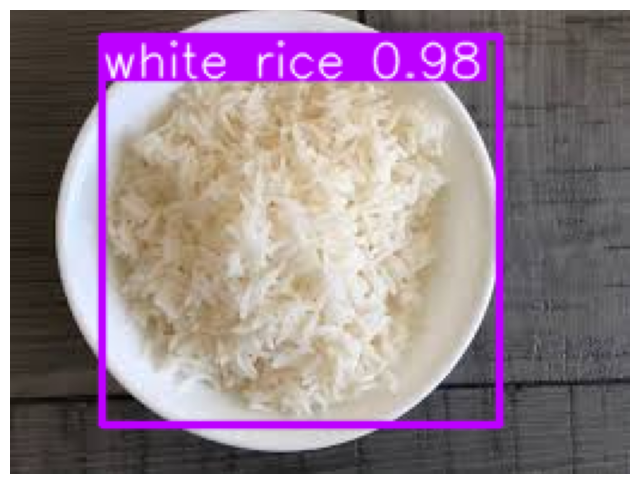

In [9]:
test_path = '/content/rice_img.jpeg'  # Replace with your test image or video path

# Inference
results = model(test_path, conf=0.5, save=True)  # Adjust confidence threshold as needed

# Display results inline in Colab
if test_path.endswith(('.jpg', '.png', '.jpeg')):
    for result in results:
        # Annotated image
        annotated_frame = result.plot()

        # Convert to RGB (for Matplotlib)
        annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

        # Display the image inline
        plt.figure(figsize=(8, 8))
        plt.imshow(annotated_frame)
        plt.axis('off')
        plt.show()

In [10]:
# Path to the directory where the weights are saved
weights_dir = os.path.join("runs", "detect", "yolo_food_detection", "weights")

# Path to the best weights file
best_weights = os.path.join(weights_dir, "best.pt")

print(f"Trained model weights saved at: {best_weights}")

Trained model weights saved at: runs/detect/yolo_food_detection/weights/best.pt
